In [59]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import gc
from sklearn import metrics 

In [60]:
accidents_info_all = pd.read_excel(r'US_Accidents_Dec21_1 - probab.xlsx')

In [61]:
accidents_info_all

,Probability,Start_Time,End_Time,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Bump,Crossing,Roundabout,Stop,Traffic_Signal
0,0.68,2017-07-01 14:25:00,2017-07-01 20:25:00,0.691,66.9,NaN,54.0,29.93,10.0,16.1,NaN,False,False,False,False,False
1,0.26,2017-07-01 14:32:00,2017-07-01 20:32:00,2.371,68.0,NaN,59.0,30.10,10.0,6.9,NaN,False,False,False,False,False
2,0.59,2017-07-01 14:31:00,2017-07-01 20:31:00,0.789,70.5,NaN,70.0,29.88,10.0,8.1,NaN,False,False,False,False,False
3,0.52,2017-07-01 14:42:00,2017-07-01 20:42:00,4.005,86.0,NaN,27.0,29.94,10.0,4.6,NaN,False,False,False,False,False
4,0.58,2017-07-01 14:42:00,2017-07-01 20:42:00,4.136,86.0,NaN,27.0,29.94,10.0,4.6,NaN,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,0.40,2021-07-18 12:58:00,2021-07-18 14:39:00,3.003,90.0,90.0,57.0,29.93,10.0,0.0,0.00,False,False,False,False,False
4482,0.43,2021-09-02 08:12:00,2021-09-02 09:25:00,0.259,68.0,68.0,100.0,28.91,10.0,0.0,0.00,False,False,False,False,False
4483,0.36,2021-08-13 14:00:00,2021-08-13 17:01:00,0.285,96.0,96.0,40.0,29.39,10.0,0.0,0.00,False,False,False,False,False
4484,0.34,2021-08-01 23:57:00,2021-08-02 01:16:00,0.219,80.0,80.0,87.0,30.09,10.0,3.0,0.08,False,False,False,False,False


In [62]:
datetime_variables = ["Start_Time"]

In [63]:
datetime_variables_processed = pd.DataFrame() #extracting date,time , month and year from start_time
for datetime_variable in datetime_variables:
    date = pd.to_datetime(accidents_info_all[datetime_variable])
    datetime_variables_processed["Accident_year"] = date.dt.year
    datetime_variables_processed["Accident_month"] = date.dt.month
    datetime_variables_processed["Accident_hour"] = date.dt.hour
    datetime_variables_processed["Accident_start"] = date

In [64]:
for datetime_variable in datetime_variables:
    date = pd.to_datetime(accidents_info_all["End_Time"])
    datetime_variables_processed["Accident_end"] = date

In [65]:
datetime_variables_processed = datetime_variables_processed.drop(["Accident_start","Accident_end"], axis=1)
datetime_variables_processed.columns

Index(['Accident_year', 'Accident_month', 'Accident_hour'], dtype='object')

In [66]:
datetime_variables_processed["Accident_hour"].unique()

array([14, 15, 17, 19, 21, 20, 22, 23,  0,  1,  3,  4,  5, 13, 16,  6,  7,
        8,  9, 10, 11, 12, 18,  2], dtype=int64)

In [67]:
datetime_variables_processed["Accident_month"].unique()

array([ 7,  3,  4,  9, 10, 12, 11,  6,  5,  8], dtype=int64)

In [68]:
accidents_info_merged = pd.merge(left=accidents_info_all, right=datetime_variables_processed, left_on=accidents_info_all.index,
         right_on=datetime_variables_processed.index) #merging the columns of time and date extracted from start_time with the data

In [69]:
accidents_info_merged

,key_0,Probability,Start_Time,End_Time,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Bump,Crossing,Roundabout,Stop,Traffic_Signal,Accident_year,Accident_month,Accident_hour
0,0,0.68,2017-07-01 14:25:00,2017-07-01 20:25:00,0.691,66.9,NaN,54.0,29.93,10.0,16.1,NaN,False,False,False,False,False,2017,7,14
1,1,0.26,2017-07-01 14:32:00,2017-07-01 20:32:00,2.371,68.0,NaN,59.0,30.10,10.0,6.9,NaN,False,False,False,False,False,2017,7,14
2,2,0.59,2017-07-01 14:31:00,2017-07-01 20:31:00,0.789,70.5,NaN,70.0,29.88,10.0,8.1,NaN,False,False,False,False,False,2017,7,14
3,3,0.52,2017-07-01 14:42:00,2017-07-01 20:42:00,4.005,86.0,NaN,27.0,29.94,10.0,4.6,NaN,False,False,False,False,False,2017,7,14
4,4,0.58,2017-07-01 14:42:00,2017-07-01 20:42:00,4.136,86.0,NaN,27.0,29.94,10.0,4.6,NaN,False,False,False,False,False,2017,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,4481,0.40,2021-07-18 12:58:00,2021-07-18 14:39:00,3.003,90.0,90.0,57.0,29.93,10.0,0.0,0.00,False,False,False,False,False,2021,7,12
4482,4482,0.43,2021-09-02 08:12:00,2021-09-02 09:25:00,0.259,68.0,68.0,100.0,28.91,10.0,0.0,0.00,False,False,False,False,False,2021,9,8
4483,4483,0.36,2021-08-13 14:00:00,2021-08-13 17:01:00,0.285,96.0,96.0,40.0,29.39,10.0,0.0,0.00,False,False,False,False,False,2021,8,14
4484,4484,0.34,2021-08-01 23:57:00,2021-08-02 01:16:00,0.219,80.0,80.0,87.0,30.09,10.0,3.0,0.08,False,False,False,False,False,2021,8,23


In [70]:
accidents_info_merged.dtypes

key_0                         int64
Probability                 float64
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Distance(mi)                float64
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Speed(mph)             float64
Precipitation(in)           float64
Bump                           bool
Crossing                       bool
Roundabout                     bool
Stop                           bool
Traffic_Signal                 bool
Accident_year                 int64
Accident_month                int64
Accident_hour                 int64
dtype: object

In [71]:
accidents_info_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4486 entries, 0 to 4485
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key_0              4486 non-null   int64         
 1   Probability        4486 non-null   float64       
 2   Start_Time         4486 non-null   datetime64[ns]
 3   End_Time           4486 non-null   datetime64[ns]
 4   Distance(mi)       4486 non-null   float64       
 5   Temperature(F)     4389 non-null   float64       
 6   Wind_Chill(F)      426 non-null    float64       
 7   Humidity(%)        4389 non-null   float64       
 8   Pressure(in)       4404 non-null   float64       
 9   Visibility(mi)     4367 non-null   float64       
 10  Wind_Speed(mph)    3642 non-null   float64       
 11  Precipitation(in)  710 non-null    float64       
 12  Bump               4486 non-null   bool          
 13  Crossing           4486 non-null   bool          
 14  Roundabo

In [72]:
accidents_info_merged.shape

(4486, 20)

In [73]:
accidents_info = accidents_info_merged

In [74]:
accidents_info.shape

(4486, 20)

In [75]:
accidents_info.dtypes

key_0                         int64
Probability                 float64
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Distance(mi)                float64
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Speed(mph)             float64
Precipitation(in)           float64
Bump                           bool
Crossing                       bool
Roundabout                     bool
Stop                           bool
Traffic_Signal                 bool
Accident_year                 int64
Accident_month                int64
Accident_hour                 int64
dtype: object

In [76]:
accidents_info.isnull().sum()

key_0                   0
Probability             0
Start_Time              0
End_Time                0
Distance(mi)            0
Temperature(F)         97
Wind_Chill(F)        4060
Humidity(%)            97
Pressure(in)           82
Visibility(mi)        119
Wind_Speed(mph)       844
Precipitation(in)    3776
Bump                    0
Crossing                0
Roundabout              0
Stop                    0
Traffic_Signal          0
Accident_year           0
Accident_month          0
Accident_hour           0
dtype: int64

In [77]:
Temperature_mean=accidents_info['Temperature(F)'].mean()
accidents_info['Temperature(F)'].fillna(value=Temperature_mean, inplace=True)

Wind_Chill_mean=accidents_info['Wind_Chill(F)'].mean()
accidents_info['Wind_Chill(F)'].fillna(value=Wind_Chill_mean, inplace=True)

Humidity_mean=accidents_info['Humidity(%)'].mean()
accidents_info['Humidity(%)'].fillna(value=Humidity_mean, inplace=True)


Pressure_mean=accidents_info['Pressure(in)'].mean()
accidents_info['Pressure(in)'].fillna(value=Pressure_mean, inplace=True)

Visibility_mean=accidents_info['Visibility(mi)'].mean()
accidents_info['Visibility(mi)'].fillna(value=Visibility_mean, inplace=True)

Wind_Speed_mean=accidents_info['Wind_Speed(mph)'].mean()
accidents_info['Wind_Speed(mph)'].fillna(value=Wind_Speed_mean, inplace=True)

Precipitation_mean=accidents_info['Precipitation(in)'].mean()
accidents_info['Precipitation(in)'].fillna(value=Precipitation_mean, inplace=True)



In [78]:
accidents_info.isnull().sum()

key_0                0
Probability          0
Start_Time           0
End_Time             0
Distance(mi)         0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Bump                 0
Crossing             0
Roundabout           0
Stop                 0
Traffic_Signal       0
Accident_year        0
Accident_month       0
Accident_hour        0
dtype: int64

In [79]:
accidents_info = accidents_info.drop(
    ['key_0', 'Start_Time', 'End_Time'], axis=1)

In [80]:
accidents_info.shape

(4486, 17)

In [81]:
accidents_info.isnull().sum()

Probability          0
Distance(mi)         0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Bump                 0
Crossing             0
Roundabout           0
Stop                 0
Traffic_Signal       0
Accident_year        0
Accident_month       0
Accident_hour        0
dtype: int64

In [82]:
Probability = accidents_info['Probability']
Probability     

0       0.68
1       0.26
2       0.59
3       0.52
4       0.58
        ... 
4481    0.40
4482    0.43
4483    0.36
4484    0.34
4485    0.32
Name: Probability, Length: 4486, dtype: float64

In [83]:
accidents_info.to_csv("NEW BUILD transformed-2-0-csv.csv")

In [84]:
def plot_hist(df, bins = None, y_label = None, x_label = None):
    plt.hist(Probability, bins=4)
    if(y_label != None):
        plt.ylabel(y_label)
    if(x_label != None):
        plt.xlabel(x_label)
    plt.show()

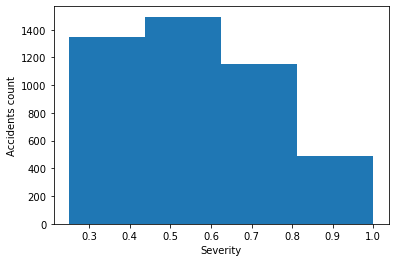

In [85]:
plot_hist(Probability, 4 , "Accidents count", "Severity")

<AxesSubplot:>

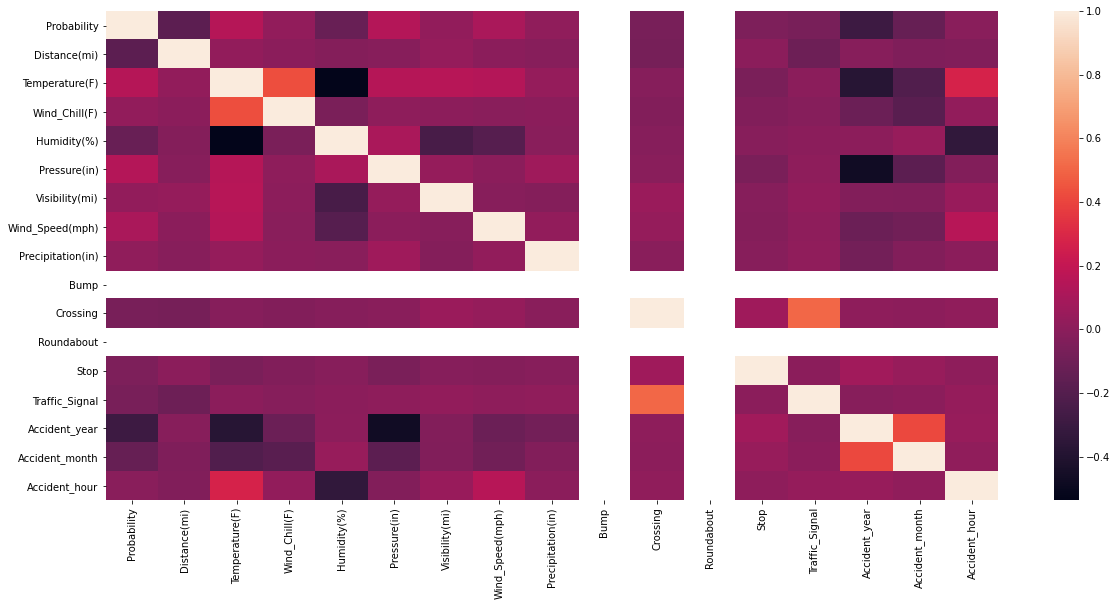

In [86]:
corr =  accidents_info.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [87]:
accidents_attributes = accidents_info.drop("Probability", axis=1)


In [88]:
accidents_attributes.dtypes

Distance(mi)         float64
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
Bump                    bool
Crossing                bool
Roundabout              bool
Stop                    bool
Traffic_Signal          bool
Accident_year          int64
Accident_month         int64
Accident_hour          int64
dtype: object

In [89]:
accidents_attributes

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Bump,Crossing,Roundabout,Stop,Traffic_Signal,Accident_year,Accident_month,Accident_hour
0,0.691,66.9,63.994131,54.0,29.93,10.0,16.1,0.079662,False,False,False,False,False,2017,7,14
1,2.371,68.0,63.994131,59.0,30.10,10.0,6.9,0.079662,False,False,False,False,False,2017,7,14
2,0.789,70.5,63.994131,70.0,29.88,10.0,8.1,0.079662,False,False,False,False,False,2017,7,14
3,4.005,86.0,63.994131,27.0,29.94,10.0,4.6,0.079662,False,False,False,False,False,2017,7,14
4,4.136,86.0,63.994131,27.0,29.94,10.0,4.6,0.079662,False,False,False,False,False,2017,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,3.003,90.0,90.000000,57.0,29.93,10.0,0.0,0.000000,False,False,False,False,False,2021,7,12
4482,0.259,68.0,68.000000,100.0,28.91,10.0,0.0,0.000000,False,False,False,False,False,2021,9,8
4483,0.285,96.0,96.000000,40.0,29.39,10.0,0.0,0.000000,False,False,False,False,False,2021,8,14
4484,0.219,80.0,80.000000,87.0,30.09,10.0,3.0,0.080000,False,False,False,False,False,2021,8,23


In [90]:
print(accidents_attributes.shape)
print(accidents_attributes.dtypes.unique())

(4486, 16)
[dtype('float64') dtype('bool') dtype('int64')]


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [92]:
 accidents_attributes_train, accidents_attributes_test, Probability_train,Probability_test =train_test_split(
     accidents_attributes, Probability, test_size = 0.1, stratify = Probability)

In [93]:
print(accidents_attributes_train.shape,accidents_attributes_test.shape)
print(Probability_train.shape,Probability_test.shape)

(4037, 16) (449, 16)
(4037,) (449,)


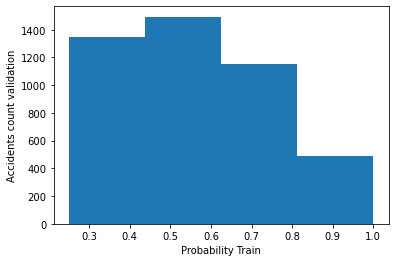

In [94]:
plot_hist(Probability_test, 4 , "Accidents count validation", "Probability Train")

In [95]:
import pickle

In [96]:
#with open('fitted_model_2-0.pickle','wb') as modelFile:
     #pickle.dump(linear_regression,modelFile)

In [97]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import xgboost as xg

In [98]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [99]:
xgb_r.fit(accidents_attributes_train, Probability_train)

[09:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

In [100]:
pred = xgb_r.predict(accidents_attributes_test)
pred

array([0.58797693, 0.63713056, 0.6324419 , 0.5471602 , 0.59694105,
       0.59286135, 0.38227937, 0.56005424, 0.57966644, 0.49001548,
       0.47757787, 0.6042136 , 0.57968986, 0.6681147 , 0.4012034 ,
       0.37551078, 0.5410623 , 0.51633334, 0.65709054, 0.6086186 ,
       0.54528826, 0.5961908 , 0.46201628, 0.6731714 , 0.67531896,
       0.6803645 , 0.6153827 , 0.73203725, 0.7332907 , 0.62113345,
       0.48293337, 0.5389246 , 0.5144587 , 0.5570888 , 0.66028345,
       0.5177049 , 0.6562498 , 0.49130937, 0.7206262 , 0.60992485,
       0.4921306 , 0.5738108 , 0.67710656, 0.56448716, 0.40484056,
       0.6265434 , 0.6964158 , 0.5994955 , 0.62320805, 0.5045234 ,
       0.49567315, 0.35948384, 0.50589377, 0.6349228 , 0.61372   ,
       0.38002676, 0.48859474, 0.58241   , 0.345855  , 0.623555  ,
       0.5410541 , 0.6534406 , 0.5657471 , 0.547404  , 0.5123309 ,
       0.60119635, 0.63523275, 0.6311001 , 0.45521852, 0.60627925,
       0.51696163, 0.61543137, 0.36480695, 0.47270283, 0.44902

In [101]:
rmse = np.sqrt(MSE(Probability_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  0.170226


In [102]:
# check the accuracy on the training set
print(xgb_r.score(accidents_attributes_train, Probability_train))
print(xgb_r.score(accidents_attributes_test, Probability_test))

0.3845544988803019
0.21563573094961308


In [105]:
def predict(Distance,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Speed,Precipitation,Bump,Crossing,Roundabout,Stop,Traffic_Signal,Accident_year,Accident_month,Accident_hour):
    df=pd.read_csv('NEW BUILD transformed-2-0-csv.csv')
    df=df.drop(['Probability'],axis=1)
    num_arr=pd.DataFrame(np.array([[Distance,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Speed,Precipitation,Bump,Crossing,Roundabout,Stop,Traffic_Signal,Accident_year,Accident_month,Accident_hour]]),columns=df.columns)
    df_concatnd=pd.concat([df,num_arr],axis=0)
    df_concatnd.reset_index(drop=True,inplace=True)
    df_concatnd_last=df_concatnd.iloc[-1,:]
    prediction=xgb_r.predict(np.array([df_concatnd_last]))
    final_probabilty=np.round(prediction,5)*100
    return final_probabilty
    

In [106]:
predict(0.224,95,95,46,29.89,10,14,0,False,False,False,False,False,2021,8,16)

array([46.56], dtype=float32)

In [107]:
with open('fitted_model_2-0-XGboost.pickle','wb') as modelFile:
     pickle.dump(xgb_r,modelFile)